Import requirments (liberaries)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

In [66]:
data = pd.read_csv(r'C:\Users\DELL2025\Downloads\Compressed\Breast Cancer Gene Expression.csv')
data.head()

C:\Users\DELL2025\AppData\Local\Temp\ipykernel_5680\1474623677.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\DELL2025\Downloads\Compressed\Breast Cancer Gene Expression.csv')


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data = data[["patient_id", "age_at_diagnosis"]]
data.head()

,patient_id,age_at_diagnosis
0,0,75.65
1,2,43.19
2,5,48.87
3,6,47.68
4,8,76.97


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        1904 non-null   int64  
 1   age_at_diagnosis  1904 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.9 KB


In [69]:
data.describe()

,patient_id,age_at_diagnosis
count,1904.000000,1904.000000
mean,3921.982143,61.087054
std,2358.478332,12.978711
min,0.000000,21.930000
25%,896.500000,51.375000
50%,4730.500000,61.770000
75%,5536.250000,70.592500
max,7299.000000,96.290000


In [70]:
data.isna().sum()

patient_id          0
age_at_diagnosis    0
dtype: int64

In [71]:
samp = data[["patient_id", "age_at_diagnosis"]].sample(50).reset_index(drop=True)
samp

,patient_id,age_at_diagnosis
0,2,43.19
1,126,61.95
2,4119,65.46
3,406,69.32
4,5172,49.57
5,5212,80.17
6,4959,76.93
7,4627,55.65
8,6125,63.27
9,5640,58.00


<Axes: >

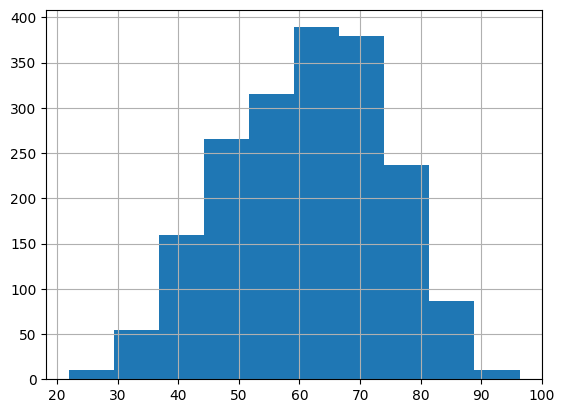

In [72]:
data["age_at_diagnosis"].hist()

In [73]:
pop_mean = data["age_at_diagnosis"].mean()
pop_std = data["age_at_diagnosis"].std()
pop_mean, pop_std

(np.float64(61.08705357142857), np.float64(12.978711486507144))

In [74]:
samp_mean = samp["age_at_diagnosis"].mean()
samp_std = samp["age_at_diagnosis"].std()       
samp_mean, samp_std

(np.float64(58.722799999999985), np.float64(13.912142404594421))

In [75]:
zscores = (samp_mean - pop_mean) / (pop_std )
zscores

np.float64(-0.18216396703836865)

In [76]:
crit_z = 1.96
crit_z > zscores

np.True_

there is no significate differances between sample and population mean so we cant reject null hypothesis

In [77]:
p_value = 1 - norm.cdf(zscores)
p_value

np.float64(0.5722729750190949)

In [78]:
p_value > 0.05

np.True_

there is no significate differances between sample and population mean so we cant reject null hypothesis

In [79]:
below_50 = (50 - samp_mean ) / samp_std
below_50    

np.float64(-0.6269918569205646)

which mean that the percentage of the patients below 50 years is  19.77% using z-score table 